In [32]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split

In [224]:
load_housing_data = pd.read_csv('Melbourne_housing_extra_data.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cf43e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11fb4df28>]], dtype=object)

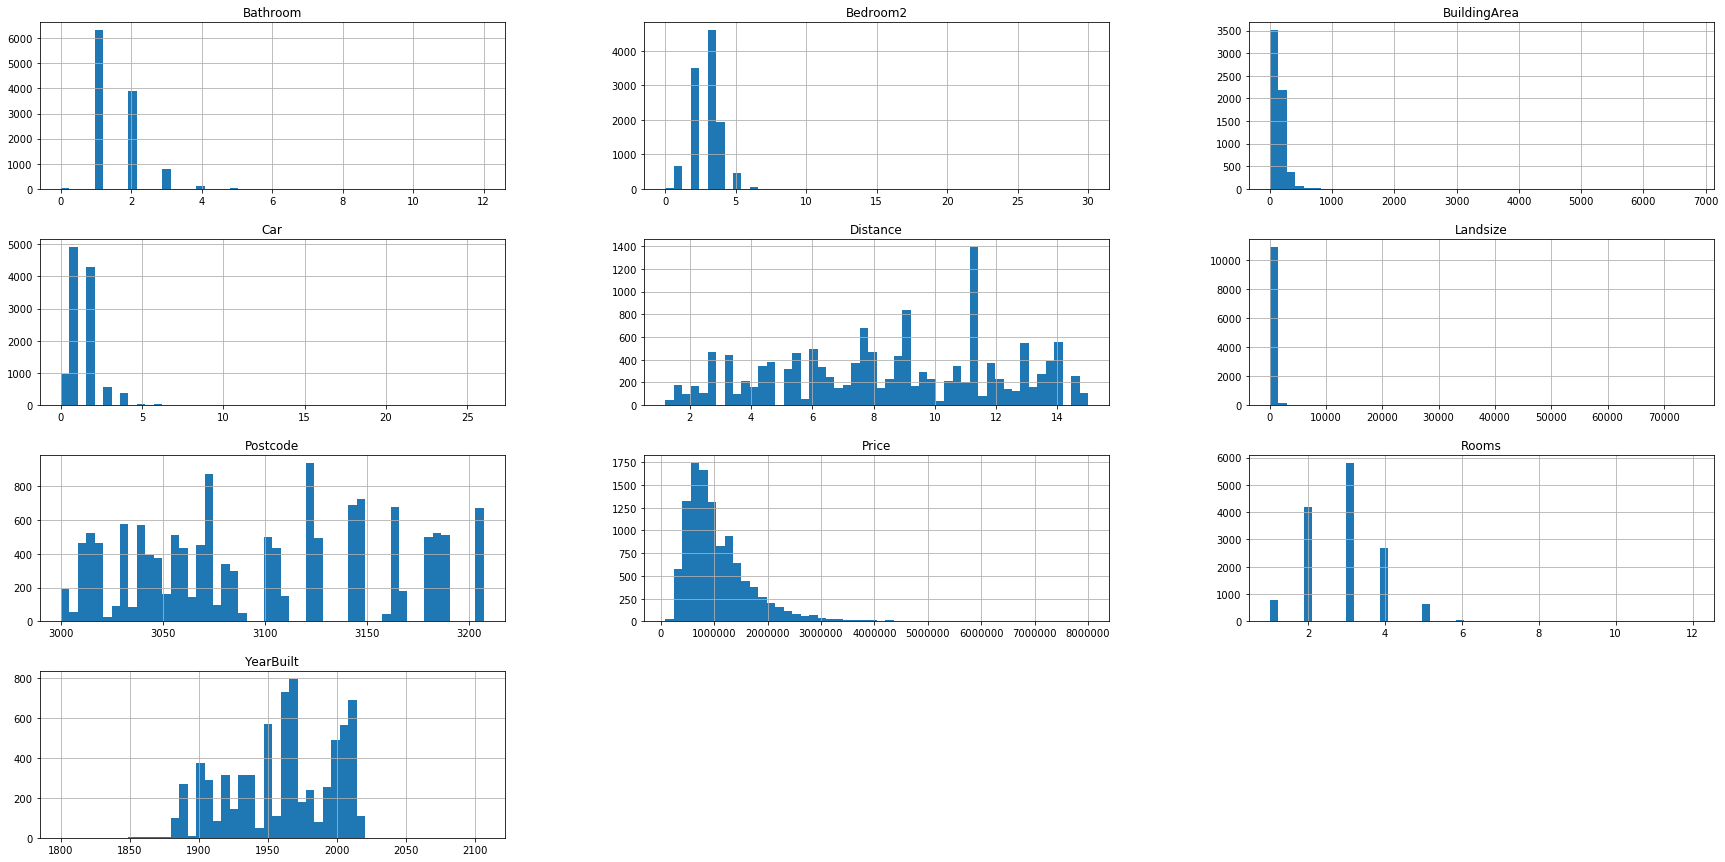

In [16]:
load_housing_data.hist(bins = 50, figsize=(30,15))


In [17]:
load_housing_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,14222.000000,1.106900e+04,14222.000000,14222.000000,11202.000000,11202.000000,11202.000000,11185.000000,6168.000000,7099.000000
mean,2.893967,1.076961e+06,8.621635,3098.212066,2.840564,1.530887,1.537850,469.181404,146.861539,1960.194534
std,0.985804,6.598991e+05,3.559325,59.575864,1.013490,0.717342,0.959796,1175.477306,135.265201,38.119790
min,1.000000,8.500000e+04,1.200000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1800.000000
25%,2.000000,6.400000e+05,5.900000,3046.000000,2.000000,1.000000,1.000000,141.000000,90.000000,1930.000000
50%,3.000000,9.000000e+05,8.800000,3085.000000,3.000000,1.000000,1.000000,351.000000,125.000000,1961.000000
75%,3.000000,1.330500e+06,11.200000,3146.000000,3.000000,2.000000,2.000000,626.000000,176.000000,1998.000000
max,12.000000,8.000000e+06,15.000000,3207.000000,30.000000,12.000000,26.000000,75100.000000,6791.000000,2106.000000


In [18]:
# splitting data to train and test

def split_data(data,test_ratio):
    per_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = per_indices[:test_set_size]
    train_indices = per_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [19]:
train_set, test_set = split_data(load_housing_data,0.2)

In [20]:
print(len(train_set))

11397


In [21]:
print(len(test_set))

2849


In [22]:
# sklearn libraries inbuild split function
train_set, test_set = train_test_split(load_housing_data,test_size=0.2,random_state=42)

In [ ]:
#============================================================================================


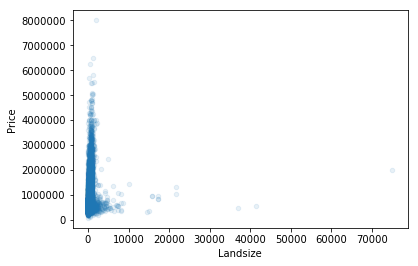

In [225]:
load_housing_data.plot(kind="scatter", x ="Landsize", y="Price", alpha =0.1)

In [226]:
corr_matrix1 = load_housing_data.corr()

In [227]:
# checking correlation 
corr_matrix1["Price"].sort_values(ascending =False)

Price           1.000000
Rooms           0.556374
Bedroom2        0.532209
Bathroom        0.515975
BuildingArea    0.361064
Car             0.287505
Postcode        0.273237
Landsize        0.071443
Distance       -0.073167
YearBuilt      -0.319787
Name: Price, dtype: float64

In [228]:
median_bed = load_housing_data["Bedroom2"].median()
load_housing_data["Bedroom2"]= load_housing_data["Bedroom2"].fillna(median_bed)

# filling NaN value with median value 
median_bath = load_housing_data["Bathroom"].median()
load_housing_data["Bathroom"]= load_housing_data["Bathroom"].fillna(median_bath)


load_housing_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude
0,Abbotsford,68 Studley St,2.0,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958
1,Abbotsford,85 Turner St,2.0,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984
2,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934
3,Abbotsford,18/659 Victoria St,3.0,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116
4,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944
5,Abbotsford,40 Federation La,3.0,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969
6,Abbotsford,55a Park St,4.0,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941
7,Abbotsford,16 Maugie St,4.0,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra,-37.7965,144.9965
8,Abbotsford,53 Turner St,2.0,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,4.0,1.0,2.0,201.0,NaN,1900.0,Yarra,-37.7995,144.9974
9,Abbotsford,99 Turner St,2.0,h,NaN,S,Collins,6/08/2016,2.5,3067.0,3.0,2.0,1.0,202.0,NaN,1900.0,Yarra,-37.7996,144.9989


In [229]:
#converting string to float
load_housing_data["Lattitude"] = pd.to_numeric(load_housing_data["Lattitude"], errors='coerce')
load_housing_data["Longtitude"] = pd.to_numeric(load_housing_data["Longtitude"], errors='coerce')


median_lat = load_housing_data["Lattitude"].median()
load_housing_data["Lattitude"]= load_housing_data["Lattitude"].fillna(median_lat)

median_long = load_housing_data["Longtitude"].median()
load_housing_data["Longtitude"]= load_housing_data["Longtitude"].fillna(median_long)


load_housing_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude
0,Abbotsford,68 Studley St,2.0,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra,-37.80140,144.99580
1,Abbotsford,85 Turner St,2.0,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840
2,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340
3,Abbotsford,18/659 Victoria St,3.0,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.81140,145.01160
4,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440
5,Abbotsford,40 Federation La,3.0,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690
6,Abbotsford,55a Park St,4.0,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410
7,Abbotsford,16 Maugie St,4.0,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra,-37.79650,144.99650
8,Abbotsford,53 Turner St,2.0,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,4.0,1.0,2.0,201.0,NaN,1900.0,Yarra,-37.79950,144.99740
9,Abbotsford,99 Turner St,2.0,h,NaN,S,Collins,6/08/2016,2.5,3067.0,3.0,2.0,1.0,202.0,NaN,1900.0,Yarra,-37.79960,144.99890


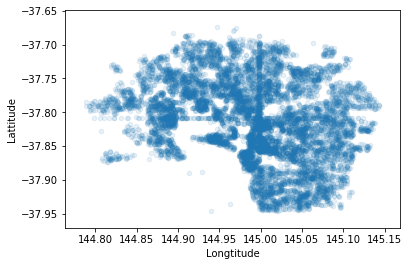

In [230]:
load_housing_data.plot(kind="scatter",x="Longtitude", y ="Lattitude", alpha =0.1)

## corr_matrix = load_housing_data.corr()
corr_matrix["Price"].sort_values(ascending =False)


In [231]:
corr_matrix1["Price"].sort_values(ascending =False)

Price           1.000000
Rooms           0.556374
Bedroom2        0.532209
Bathroom        0.515975
BuildingArea    0.361064
Car             0.287505
Postcode        0.273237
Landsize        0.071443
Distance       -0.073167
YearBuilt      -0.319787
Name: Price, dtype: float64

In [232]:

# removing BuildingArea with axis = 1 [means column and not row [0]]
load_housing_data = load_housing_data.drop("BuildingArea",axis = 1)
load_housing_data = load_housing_data.drop("YearBuilt",axis = 1)


In [233]:
load_housing_data = load_housing_data.drop("Method",axis = 1)
load_housing_data = load_housing_data.drop("Type",axis = 1)
load_housing_data = load_housing_data.drop("Address",axis = 1)
load_housing_data = load_housing_data.drop("Suburb",axis = 1)
load_housing_data = load_housing_data.drop("CouncilArea",axis = 1)
load_housing_data = load_housing_data.drop("Date",axis = 1)
load_housing_data = load_housing_data.drop("SellerG",axis = 1)
load_housing_data = load_housing_data.drop("Landsize",axis = 1)

In [234]:

load_housing_data = load_housing_data.dropna(subset = ["Price"])

In [235]:
#load_housing_data = load_housing_data.dropna(subset = ["Landsize"])
load_housing_data = load_housing_data.dropna(subset = ["Car"])
load_housing_data

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Lattitude,Longtitude
1,2.0,1480000.0,2.5,3067.0,2.0,1.0,1.0,-37.79960,144.99840
2,2.0,1035000.0,2.5,3067.0,2.0,1.0,0.0,-37.80790,144.99340
4,3.0,1465000.0,2.5,3067.0,3.0,2.0,0.0,-37.80930,144.99440
5,3.0,850000.0,2.5,3067.0,3.0,2.0,1.0,-37.79690,144.99690
6,4.0,1600000.0,2.5,3067.0,3.0,1.0,2.0,-37.80720,144.99410
10,2.0,941000.0,2.5,3067.0,2.0,1.0,0.0,-37.80410,144.99530
11,3.0,1876000.0,2.5,3067.0,4.0,2.0,0.0,-37.80240,144.99930
14,2.0,1636000.0,2.5,3067.0,2.0,1.0,2.0,-37.80600,144.99540
17,1.0,300000.0,2.5,3067.0,1.0,1.0,1.0,-37.80080,144.99730
18,2.0,1097000.0,2.5,3067.0,3.0,1.0,2.0,-37.80100,144.99890


In [236]:
corr_matrix = load_housing_data.corr()

In [237]:
corr_matrix1["Price"].sort_values(ascending =False)

Price           1.000000
Rooms           0.556374
Bedroom2        0.532209
Bathroom        0.515975
BuildingArea    0.361064
Car             0.287505
Postcode        0.273237
Landsize        0.071443
Distance       -0.073167
YearBuilt      -0.319787
Name: Price, dtype: float64

In [238]:
# cleaning is done 
y = load_housing_data["Price"]


In [239]:
# now split w/ scikit-learn
from sklearn.cross_validation import train_test_split

In [240]:
load_housing_data = load_housing_data.drop("Price",axis = 1)


In [241]:
X_train,X_test,y_train,y_test = train_test_split(load_housing_data,y)

In [242]:
# linear regression model 
from sklearn.linear_model import LinearRegression

# create an object

linreg = LinearRegression()

#fit the model 
model = linreg.fit(X_train,y_train)

In [243]:
y_pred = linreg.predict(X_test)

df = X_test.copy


In [244]:
X_test 

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Lattitude,Longtitude
6019,3.0,5.6,3101.0,3.0,2.0,2.0,-37.79930,145.02670
10918,3.0,7.0,3013.0,3.0,1.0,2.0,-37.81430,144.88650
5095,2.0,13.7,3188.0,2.0,2.0,2.0,-37.94480,145.01860
11051,2.0,9.5,3081.0,2.0,1.0,0.0,-37.75340,145.04540
5094,3.0,13.7,3188.0,3.0,2.0,2.0,-37.93640,145.02100
4047,2.0,8.0,3040.0,2.0,1.0,2.0,-37.75430,144.93070
13737,3.0,6.1,3182.0,3.0,1.0,0.0,-37.86345,144.98158
14053,2.0,7.7,3184.0,2.0,1.0,1.0,-37.88596,144.99760
5622,3.0,7.9,3079.0,3.0,1.0,1.0,-37.76450,145.03140
10404,3.0,4.6,3142.0,3.0,1.0,2.0,-37.84350,145.00430


In [245]:
y_pred

y_pred_series = pd.DataFrame(y_pred)

In [246]:
(y_test)

6019     1330000.0
10918    1035000.0
5095      896000.0
11051     855000.0
5094     1320000.0
4047     1001000.0
13737    1000000.0
14053     687000.0
5622     1102000.0
10404    1635000.0
7329      435000.0
185      1750000.0
11090     370000.0
12215    1600000.0
8430      436000.0
13301     926000.0
6886     1260000.0
3524     1172000.0
13459    2400000.0
6827     2000000.0
604      1575000.0
3359     1000000.0
13081    2325000.0
11075     899000.0
386       700000.0
11141     368000.0
2666     2325000.0
9972      510000.0
4408      752000.0
13452     520000.0
           ...    
6205      935000.0
4758      610000.0
6968     1400000.0
10188     790000.0
228      1485000.0
5996     2625000.0
4571     1550000.0
11815     620000.0
4432      932000.0
8590      791000.0
8571      424000.0
12448     385000.0
2836     2200000.0
8262      670000.0
344       988000.0
12672     650000.0
2891      765000.0
7634     1120000.0
5799      905000.0
11529    1125000.0
4234      597000.0
9482      87

In [247]:
y_pred_series

,0
0,1.462905e+06
1,9.949290e+05
2,9.881262e+05
3,5.172994e+05
4,1.321768e+06
5,5.780896e+05
6,1.251816e+06
7,9.493705e+05
8,1.021718e+06
9,1.432929e+06


(array([   2.,   20.,   21.,   38.,   80.,  138.,  141.,  216.,  179.,
         211.,  186.,  147.,  147.,  169.,  119.,   92.,   70.,   56.,
          50.,   33.]),
 array([       0.,   100000.,   200000.,   300000.,   400000.,   500000.,
          600000.,   700000.,   800000.,   900000.,  1000000.,  1100000.,
         1200000.,  1300000.,  1400000.,  1500000.,  1600000.,  1700000.,
         1800000.,  1900000.,  2000000.]),
 <a list of 20 Patch objects>)

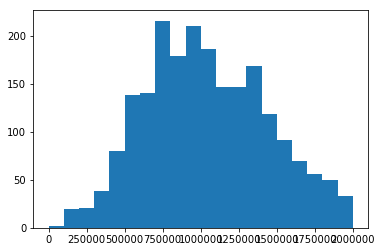

In [252]:
plt.hist(y_pred_series,bins =20, range=[0,2000000])

(array([   0.,    1.,   19.,   85.,  178.,  158.,  212.,  190.,  219.,
         183.,  122.,  102.,  113.,  106.,   82.,   55.,   62.,   45.,
          52.,   36.]),
 array([       0.,   100000.,   200000.,   300000.,   400000.,   500000.,
          600000.,   700000.,   800000.,   900000.,  1000000.,  1100000.,
         1200000.,  1300000.,  1400000.,  1500000.,  1600000.,  1700000.,
         1800000.,  1900000.,  2000000.]),
 <a list of 20 Patch objects>)

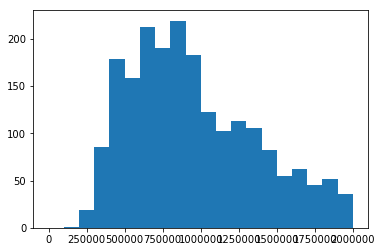

In [251]:
plt.hist(y_test,bins=20,range=[0,2000000])

(array([   1.,    6.,   73.,  268.,  443.,  512.,  650.,  626.,  605.,
         497.,  370.,  326.,  325.,  315.,  259.,  178.,  182.,  139.,
         115.,  138.]),
 array([       0.,   100000.,   200000.,   300000.,   400000.,   500000.,
          600000.,   700000.,   800000.,   900000.,  1000000.,  1100000.,
         1200000.,  1300000.,  1400000.,  1500000.,  1600000.,  1700000.,
         1800000.,  1900000.,  2000000.]),
 <a list of 20 Patch objects>)

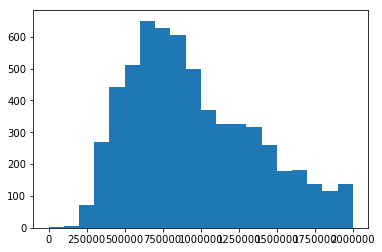

In [253]:
plt.hist(y_train,bins = 20,range=[0,2000000])


In [260]:
(y_pred_series)
y_pred_series.to_csv("test_pred.csv", encoding='utf-8')

In [261]:
y_test.to_csv("test_y_test.csv", encoding='utf-8')

In [262]:
X_test.to_csv("testt.csv", encoding='utf-8')

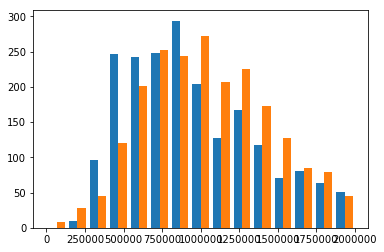

In [285]:
plt.hist((y_test,y_pred_series),bins = 15,range=[0,2000000],alpha = 1)
#plt.hist(y_pred_series,  bins = 500,range=[0,2000000],alpha = 0.5)
plt.show()

'/Users/Biken/Desktop'